In [ ]:
import numpy as np
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(42)

In [ ]:
# Pobranie danych dla akcji PKN Orlen
pkn = yf.Ticker("pkn.wa")

pkn_hist = pkn.history(start="2000-01-01", end="2024-03-01", interval="1d")

In [ ]:
prices = pkn_hist['Close'].values
prices_log = np.log10(prices)

# Logarytmiczne stopy zwrotu
log_return_rates = np.diff(prices_log)

# Normalizacja
mean = np.mean(log_return_rates)
std = np.std(log_return_rates)
log_return_rates_norm = (log_return_rates - mean) / std

In [ ]:
# Generowanie danych o rozkładzie normalnym
white_noise = np.random.normal(0, 1, len(log_return_rates_norm))

Skośność szumu białego: 0.02, Kurtoza: 0.03
Skośność stóp zwrotu: -0.01, Kurtoza: 2.10


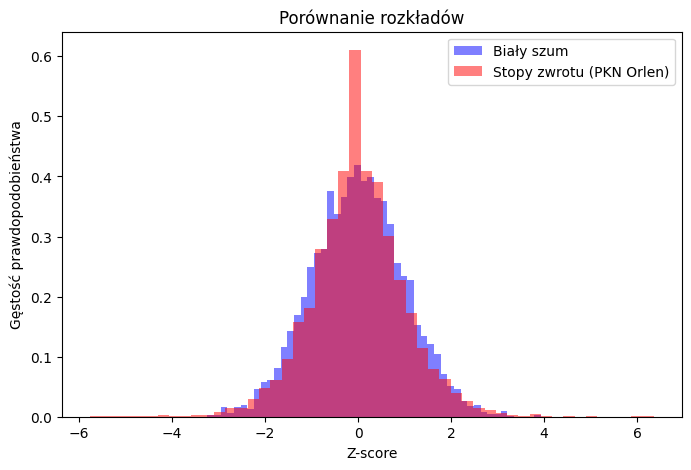

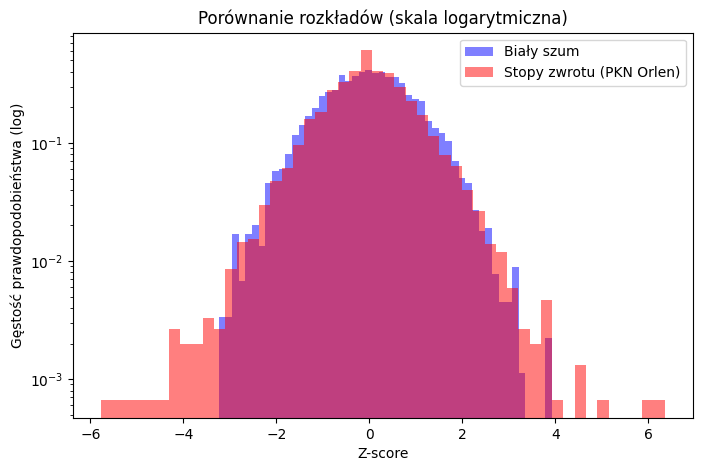

In [ ]:
bins = 50  # Liczba przedziałów

hist_wn, bins_wn = np.histogram(white_noise, bins=bins, density=True)  # Histogram dla szumu białego
hist_sr, bins_sr = np.histogram(log_return_rates_norm, bins=bins, density=True)  # Histogram dla stóp zwrotu

# Obliczenie skośności i kurtozy
skew_wn, kurt_wn = stats.skew(white_noise), stats.kurtosis(white_noise)
skew_sr, kurt_sr = stats.skew(log_return_rates_norm), stats.kurtosis(log_return_rates_norm)

print(f"Skośność szumu białego: {skew_wn:.2f}, Kurtoza: {kurt_wn:.2f}")
print(f"Skośność stóp zwrotu: {skew_sr:.2f}, Kurtoza: {kurt_sr:.2f}")

# Wykres histogramów (z normalizacją)
plt.figure(figsize=(8, 5))
plt.hist(white_noise, bins=bins, density=True, alpha=0.5, label="Biały szum", color="blue")
plt.hist(log_return_rates_norm, bins=bins, density=True, alpha=0.5, label="Stopy zwrotu (PKN Orlen)", color="red")
plt.title("Porównanie rozkładów")
plt.xlabel("Z-score")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.show()

# Wykres w skali logarytmicznej
plt.figure(figsize=(8, 5))
plt.hist(white_noise, bins=bins, density=True, alpha=0.5, label="Biały szum", color="blue")
plt.hist(log_return_rates_norm, bins=bins, density=True, alpha=0.5, label="Stopy zwrotu (PKN Orlen)", color="red")
plt.yscale("log")
plt.title("Porównanie rozkładów (skala logarytmiczna)")
plt.xlabel("Z-score")
plt.ylabel("Gęstość prawdopodobieństwa (log)")
plt.legend()
plt.show()

In [ ]:
# Wybór ogonów
left_tail = np.abs(log_return_rates_norm[log_return_rates_norm <= -1])
right_tail = log_return_rates_norm[log_return_rates_norm >= 1]
tail = np.concatenate((left_tail, right_tail))

# Histogram
bins = 50
hist, bin_edges = np.histogram(tail, bins=bins, density=True)
x_vals = (bin_edges[:-1] + bin_edges[1:]) / 2

# Filtracja wartości zerowych przed logarytmowaniem
nonzero_mask = (hist > 0) & (x_vals > 0)
x_vals = x_vals[nonzero_mask]
hist = hist[nonzero_mask]

x_vals = np.log10(x_vals)
hist = np.log10(hist)

# Dopasowanie prostej
slope, intercept = np.polyfit(x_vals, hist, 1)
fit_line = slope * x_vals + intercept

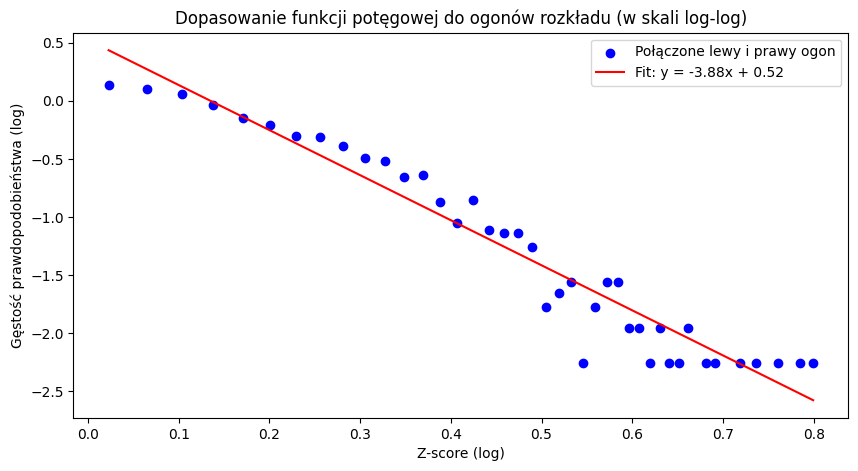

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(x_vals, hist, color="blue", label="Połączone lewy i prawy ogon")
plt.plot(x_vals, fit_line, color="red", label=f"Fit: y = {slope:.2f}x + {intercept:.2f}")
plt.legend()
plt.title("Dopasowanie funkcji potęgowej do ogonów rozkładu (w skali log-log)")
plt.xlabel("Z-score (log)")
plt.ylabel("Gęstość prawdopodobieństwa (log)")
plt.show()

In [ ]:
tail = np.concatenate((left_tail, right_tail))

# Histogram
bins = 50
hist, bin_edges = np.histogram(tail, bins=bins, density=True)
x_vals = (bin_edges[:-1] + bin_edges[1:]) / 2  # Środek binów

# Funkcja przeżycia
survival_function = 1 - np.cumsum(hist) / np.sum(hist)

# Filtracja niezerowych wartości przed logarytmowaniem
mask = (x_vals > 0) & (survival_function > 0)
x_vals = x_vals[mask]
survival_function = survival_function[mask]
x_vals = x_vals[:-1]
survival_function = survival_function[:-1]

# Logarytmowanie
x_vals_log = np.log10(x_vals)
survival_function_log = np.log10(survival_function)

# Kopia danych przed wyborem zakresu
x_vals_log_c = x_vals_log.copy()
survival_function_log_c = survival_function_log.copy()

# Wybór zakresu do dopasowania
fit_mask = (x_vals_log > 0.0) & (x_vals_log < 0.5)
x_fit = x_vals_log[fit_mask]
y_fit = survival_function_log[fit_mask]

# Dopasowanie prostej
slope, intercept = np.polyfit(x_fit, y_fit, 1)
fit_line = slope * x_fit + intercept

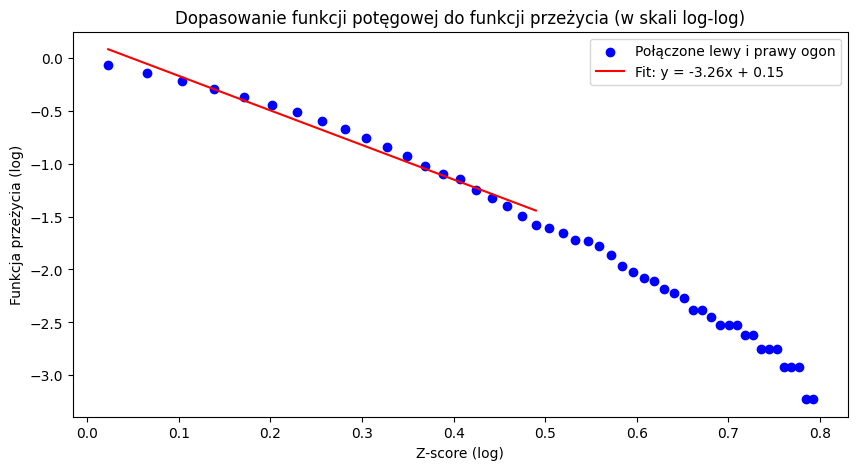

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(x_vals_log_c, survival_function_log_c, color="blue", label="Połączone lewy i prawy ogon")
plt.plot(x_fit, fit_line, color="red", label=f"Fit: y = {slope:.2f}x + {intercept:.2f}")
plt.legend()
plt.title("Dopasowanie funkcji potęgowej do funkcji przeżycia (w skali log-log)")
plt.xlabel("Z-score (log)")
plt.ylabel("Funkcja przeżycia (log)")
plt.show()